The aim of this notebook is to showcase GIS functionality and
to demonstrate that through spatial clustering analysis, we can
glean an understanding of the relevance and possible affectations
of inferring correlations based on comparative density-based
cluster analyses. By reviewing multiple facets of the dataset and
by performing a comparative analysis, we can see not only the
trends of individual features, but also what underlying aspects
to consider before drawing conclusions.

In [29]:
# Import the Assessment 4 Module
import data_processing as dp
import cluster_analysis as ca

In [30]:
# Initializing file name variables
file2013 = "2013.shp"
file2014 = "2014.shp"
file2015 = "2015.shp"
file2016 = "2016.shp"
file2017 = "2017.shp"
file2018 = "2018.shp"
fileLGA = "LGA_2017_VIC.shp"

In [31]:
# Reading the accident files from 2013 - 2018
data2013 = dp.import_shp(file2013)
data2014 = dp.import_shp(file2014)
data2015 = dp.import_shp(file2015)
data2016 = dp.import_shp(file2016)
data2017 = dp.import_shp(file2017)
data2018 = dp.import_shp(file2018)

In [32]:
# Aggregating the dataframes in preparation for use in future tasks.
agg_df = [data2013, data2014, data2015, data2016, data2017, data2018]
comb_df = dp.combine_dataframes(agg_df)

## Task 1: Data Extraction and Exploratory Analysis
### Text Output: Average of and Common Types of Accidents

To begin, we can parse the data according to specific filters.

In [33]:
# Task 1.1 a) Average number of accidents
total = sum(len(data) for data in agg_df)
count = len(agg_df)
average = total / count
print(f'    (a) The average number of accidents per year is {average:.3f}.')

    (a) The average number of accidents per year is 12211.833.


In [34]:
# Task 1.1 b) Common types of accidents
freq = dp.count_frequency(comb_df['ACCIDENT_1'])

type1 = freq[0][0]
per1 = freq[0][1] / len(comb_df) * 100
type2 = freq[1][0]
per2 = freq[1][1] / len(comb_df) * 100

print(f'    (b) The most commont type of accident in all the recorded years is {type1:s} \n'
      f'        (equal to {per1:.2f}% accidents), and the second most common is {type2:s} \n'
      f'        (equal to {per2:.2f}%).')

    (b) The most commont type of accident in all the recorded years is Collision with vehicle 
        (equal to 62.98% accidents), and the second most common is Collision with a fixed object 
        (equal to 15.77%).


### Tabular Output: Vehicle Types and LGAs

We can display parsed data in tabular format.

Table 1 shows the number of accidents by vehicle by year. 
We have calculated accident numbers using the following five columns.

- *BICYCLIST*
- *HEAVYVEHIC*
- *PASSENGERV*
- *MOTORCYCLE*
- *PUBLICVEHI*

Our assumption is that the summation includes all involved vehicles. That is, if a pedal vehicle clashes with a motorcyle, each vehicle is counted. Similarly, if a motorcycle clashes with other motorcyle, the number of accidents involving motorcycles will increase by two.

In [35]:
#| output: 

# Same cell is in Appendix for putting this table in Appendix (Table 1)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Task 1.2 a) Number of Accidents by Vehicle Type
table1 = dp.show_accident_type_stats(data2013, data2014, data2015, data2016, data2017, data2018)
table1

,2013,2014,2015,2016,2017,2018
Passenger Vehicle,9210,20092,20420,20888,17764,15908
Motorcycle,936,2180,2216,2215,1880,1733
Pedal Vehicle,682,1614,1564,1403,1313,1211
Heavy Vehicle,302,606,702,616,589,545
Public Transport,86,173,211,156,147,161


In [36]:
#| output: false

# Same cell is in Appendix for putting this table in Appendix (Table 2)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Task 1.2 b) Number of Accidents Per LGA
# The table is too wide to be legible on portrait A4 paper, so it has been divided into 2 
accLGAdf = dp.show_accident_LGA_count_stats(data2013, data2014, data2015, data2016, data2017, data2018)

# 2013 through 2015
accLGAdf.iloc[:, :8]

2013   2014                    2015                
         LGA    No.    No.  Diff.    Change    No. Diff.    Change
0  MELBOURNE  380.0  837.0  457.0  1.202632  853.0  16.0  0.019116
1    GEELONG  241.0  505.0  264.0  1.095436  489.0 -16.0 -0.031683
2      CASEY  234.0  532.0  298.0  1.273504  600.0  68.0  0.127820
3   BRIMBANK  232.0  475.0  243.0  1.047414  454.0 -21.0 -0.044211
4  DANDENONG  220.0  468.0  248.0  1.127273  503.0  35.0  0.074786
5     MONASH  208.0  442.0  234.0  1.125000  435.0  -7.0 -0.015837
6       HUME  191.0  447.0  256.0  1.340314  448.0   1.0  0.002237
7   MORELAND  185.0  405.0  220.0  1.189189  435.0  30.0  0.074074
8   KINGSTON  177.0  369.0  192.0  1.084746  338.0 -31.0 -0.084011
9    DAREBIN  170.0  330.0  160.0  0.941176  365.0  35.0  0.106061

In [37]:
#| output: false

# Same cell is in Appendix for putting this table in Appendix

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# 2016 through 2018
accLGAdf.drop([('2013',    'No.'), 
               ('2014',    'No.'),
               ('2014',  'Diff.'),
               ('2014', 'Change'),
               ('2015',    'No.'),
               ('2015',  'Diff.'),
               ('2015', 'Change')],
              axis=1)

2016                    2017                    2018        \
         LGA    No.  Diff.    Change    No.  Diff.    Change    No. Diff.   
0  MELBOURNE  746.0 -107.0 -0.125440  683.0  -63.0 -0.084450  642.0 -41.0   
1    GEELONG  533.0   44.0  0.089980  519.0  -14.0 -0.026266  454.0 -65.0   
2      CASEY  640.0   40.0  0.066667  498.0 -142.0 -0.221875  474.0 -24.0   
3   BRIMBANK  431.0  -23.0 -0.050661  361.0  -70.0 -0.162413  353.0  -8.0   
4  DANDENONG  541.0   38.0  0.075547  417.0 -124.0 -0.229205  355.0 -62.0   
5     MONASH  420.0  -15.0 -0.034483  353.0  -67.0 -0.159524  314.0 -39.0   
6       HUME  478.0   30.0  0.066964  387.0  -91.0 -0.190377  390.0   3.0   
7   MORELAND  405.0  -30.0 -0.068966  352.0  -53.0 -0.130864  362.0  10.0   
8   KINGSTON  320.0  -18.0 -0.053254  308.0  -12.0 -0.037500  282.0 -26.0   
9    DAREBIN  344.0  -21.0 -0.057534  281.0  -63.0 -0.183140  291.0  10.0   

             
     Change  
0 -0.060029  
1 -0.125241  
2 -0.048193  
3 -0.022161  
4 -0.148681  
5 -0.110482  
6  0.007752  
7  0.028409  
8 -0.084416  
9  0.035587

### Charts and Maps: Bar Charts, Line Charts, Choropleths

We can also display filter-parsed data as charts. For example:

- Accidents Per Day of the Week as a bar chart (Figure 1)
- Yearly Change in Accidents by Severity as a line chart (Figure 2)
- Fraction of the Most Common Category of Accidents as a choropleth (Figure 3)

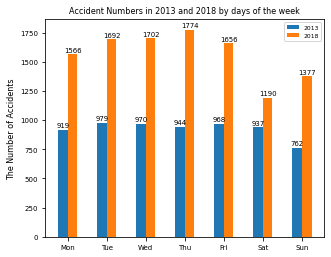

In [38]:
#| output: false

# Same cell is in Appendix for putting this char in Appendix 

# Task 1.3 a) Accidents Per Day of the Week
dp.plot_bars_accidents(data2013, data2018)

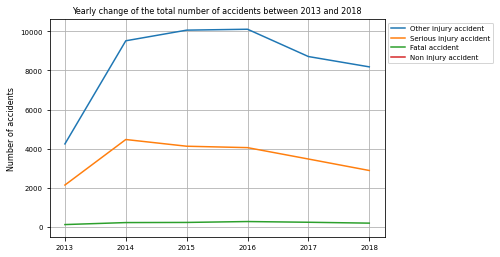

In [39]:
#| output: false

# Same cell is in Appendix for putting this char in Appendix

# Task 1.3 b) Total Accidents Over the Years
dp.show_accident_severity_stats(data2013, data2014, data2015, data2016, data2017, data2018)

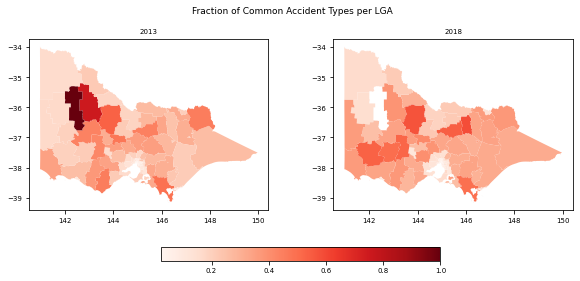

In [40]:
#| output: false

# Same cell is in Appendix for putting this figure in Appendix

# Task 1.3 c) Choropleth Maps of the Common Accident Types Per LGA
LGA17 = dp.import_shp(fileLGA)
mcat = dp.most_common_accident_type(comb_df)
cat_df = dp.create_choropleths(data2013, data2018, LGA17, mcat)

\newpage

## Task 2: Analysis-Ready Data Export 

We can also export the data as a GeoPackage to be used in other programs, such as ArcGIS or QGIS. The derivalable in Task  2 is accident.gpkg containing the following layers.

- AccidentsByYear
- AccidentsByLGA
- AccidentLocations
- SevereAccidentsWeekday
- SevereAccidentsWeekend

In [41]:
#| echo: true
#| output: false

# Task 2.1
# Create a geopackage with the data from Task 1.2.a and 1.2.b
acc_VT = dp.add_state_geom(
    df=dp.show_accident_type_stats(
        data2013, data2014, data2015, data2016, data2017, data2018),
        lga_data=LGA17)
acc_LGA = dp.create_accident_per_LGA_gdf(
    data2013, data2014, data2015, data2016, data2017, data2018,
    lga_data=LGA17, number_of_LGAs=0)
fname_gpkg = "accidents.gpkg"

dp.export_gpkg(
    gdf=acc_VT, filename=fname_gpkg, layer_name='AccidentsByYear')
dp.export_gpkg(
    gdf=acc_LGA, filename=fname_gpkg, layer_name='AccidentsByLGA')

In [42]:
#| echo: true
#| output: false

# Task 2.2
# Add Accident Locations layer
acc_gdf =  dp.create_accident_location(comb_df)
dp.export_gpkg(acc_gdf, fname_gpkg, 'AccidentLocations', driver='GPKG')

In [43]:
#| echo: true
#| output: false

# Task 2.3
# Add SA2 data to Accident Locations
# Using R-Tree
dp.identify_SA2_RTree(fname_gpkg)

In [44]:
#| echo: true
#| output: false

# Task 2.4 
# Split Accident Locations into 2 layers
dp.split_accident_locations(fname_gpkg)

\newpage

## Task 3: Comparative Cluster Analysis

In [45]:
melb_data = dp.get_single_lga_data(comb_df, 'MELBOURNE')

# Melbourne by Severity
sev1 = melb_data.loc[melb_data['SEVERITY'] == 'Other injury accident']
sev2 = melb_data.loc[melb_data['SEVERITY'] != 'Other injury accident']

# Melbourne by Speed Zone
spd1 = melb_data.loc[(melb_data['SPEED_ZONE'] == '100 km/hr') | (melb_data['SPEED_ZONE'] == '80 km/hr') | (melb_data['SPEED_ZONE'] == '70 km/hr')]
spd2 = melb_data.loc[(melb_data['SPEED_ZONE'] == '60 km/hr') | (melb_data['SPEED_ZONE'] == '50 km/hr') | (melb_data['SPEED_ZONE'] == '30km/hr')]

# Melbourne by Alcohol
alc1 = melb_data.loc[melb_data['ALCOHOLTIM'] == 'Yes']
alc2 = melb_data.loc[melb_data['ALCOHOLTIM'] == 'No']

# Melbourne by Accident Type (Vehicle vs not Vehicle)
typ1 = melb_data.loc[melb_data['ACCIDENT_1'] == 'Collision with vehicle']
typ2 = melb_data.loc[melb_data['ACCIDENT_1'] != 'Collision with vehicle']

# Melbourne by Number of People Involved (Vs Mean)
num1 = melb_data.loc[melb_data['TOTAL_PERS'] <= melb_data['TOTAL_PERS'].median()]
num2 = melb_data.loc[melb_data['TOTAL_PERS'] > melb_data['TOTAL_PERS'].median()]

In alignment with other spatial analyses, a comparative analysis of density based clusters expectedly reaffirms that there is a significant amount of activity in the most populated region. Although the accident data has already been filtered to specifically analyze the LGA which boasted the highest number of accidents across all avaialable years, even within that LGA there is a particularly uneven distribution in the Statistical Area (SA) which contains the CBD. Nonetheless, by comparing various filters to both the "Not Severe" (nSev) and "Severe/Fatal" (SevF) clusters (Figure 1), we can see beyond just this corellation of population density. As an additional point of reference, we have drawn population data for each SA, as provided by the Australian Bureau of Statistics. By cross-referencing this dataset and using it as a background subplot, we can confirm the uneven distribution based on population density (Figure 7). 

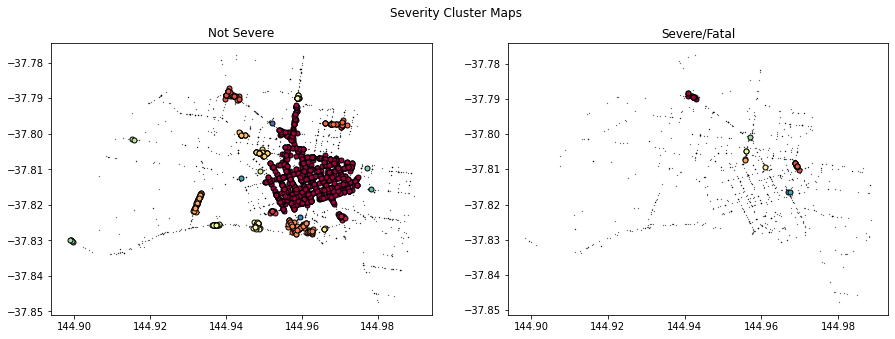

In [46]:
#| label: fig-cluster
#| fig-cap: "Severity Cluster Map"

ca.create_DBSCAN_subplot(dataset1=sev1, dataset2=sev2, title="Severity Cluster Maps", subtitle1="Not Severe", subtitle2="Severe/Fatal")

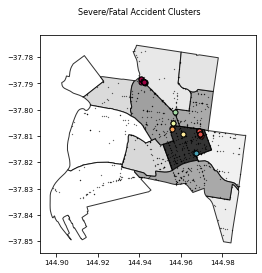

In [47]:
#| output: false

# Same cell is in Appendix for putting this figure in Appendix

ca.create_DBSCAN_with_pop(dataset=sev2, title="Severe/Fatal Accident Clusters")

While unsurprisingly the majority of the clusters do align within the CBD SA, looking at the clusters based on regions where the Speed Zone exceeds 70 kmph (Figure 2), there is a specific lack of correlation in comparison with the SevF clusters. This noteable because these clusters do appear in the nSev clusters, but their absence in the SevF clusters might imply that in this region (Melbourne), higher speed limits do not directly correlate with severe or fatal injuries. Moreover, there are points along the high speed zones which fall into the SevF dataset but are considered noise as they do not have as of a strong spatial correlation in comparison to some of the clusters within the city. To note, as speed zones are strictly designated, it is within expectations that there are few accidents in this filter which fall in the highest population density SAs. Still, we can draw conclusions of relevance because there is no such limiter on the SevF cluster dataset.

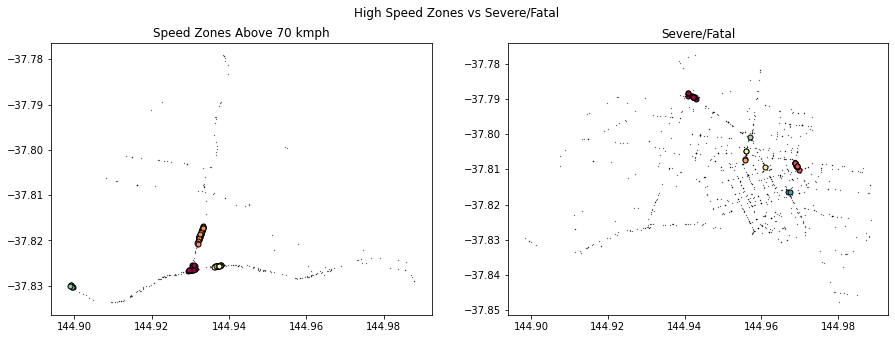

In [48]:
#| label: fig-sp-vs-sev
#| fig-cap: "Comparison between accidents in high speed zones and accident severity"

ca.create_DBSCAN_subplot(dataset1=spd1, dataset2=sev2, title="High Speed Zones vs Severe/Fatal", subtitle1="Speed Zones Above 70 kmph", subtitle2="Severe/Fatal")

Another interesting comparison can be seen when looking at the accidents involving alcohol in reference to the populated SAs (Figure 8). In comparison to the nSev clusters, it would appear that the accidents involving alcohol appear as a subset of the clusters regions. This is noteable because it directly reinforces the notion that many of these accident clusters are spatially correlated with population density primarily, and with other accident filters secondarily. Even amongst the comparison of SevF clusters to nSev clusters, this pattern is to some degree self-evident, as the SevF clusters each fall within some region of nSev clusters.

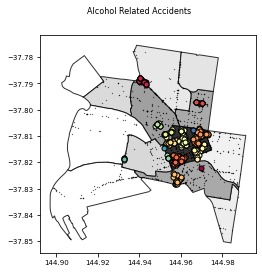

In [49]:
#| output: false

# Same cell is in Appendix for putting this figure in Appendix

ca.create_DBSCAN_with_pop(dataset=alc1, title="Alcohol Related Accidents")

We can also look at the filter illustrating Accidents with Non-vehicles as a point of reinforcement (Figure 9). The majority of the clusters fall within the CDB SA, which would also be a reasonable assumption given the prior understanding than although there are many areas in this LGA where people may travel by foot, the CBD outstrips many in its relevance. Using this kind of information and clustering as part of comparative cluster analysis may thus lead to skewed derivations unless this overwhelming discrepancy based on population density is first addressed.

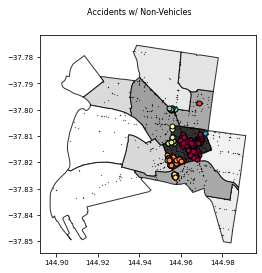

In [50]:
#| output: false

# Same cell is in Appendix for putting this figure in Appendix

ca.create_DBSCAN_with_pop(dataset=typ2, title="Accidents w/ Non-Vehicles")

Looking at the data of "Accidents by Number of People Involved" (Figure 3), which was derived based on the median number of people involved in the accident (in this case median and mode are both 2 and mean lies between 2 and 3), we see more of the similarly identified points regarding population density. However, there is one point to identify, which is that there are clusters present only in the filter with more than 2 people involved. This set of clusters falls along the aforementioned area where the speed zones are at least 70 kmph. In combination with the prior discussion of nSev accidents along high speed zones, we can thus further infer that there is a correlation insofar as non severe accidents with more than 2 people in high speed areas. This correlation alone, however is not so much conclusive as it is a point of interest to review in comparison to the majority of data which follows the general pattern of population density.

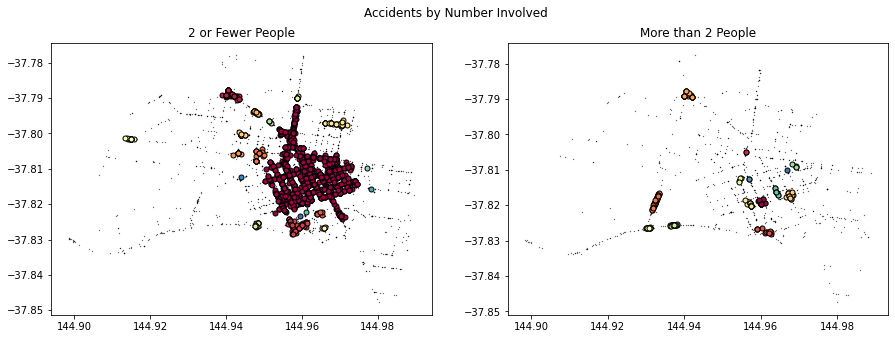

In [51]:
#| label: fig-involved-num
#| fig-cap: "Cluster maps for comparison in number involved"

ca.create_DBSCAN_subplot(dataset1=num1, dataset2=num2, title="Accidents by Number Involved", subtitle1="2 or Fewer People", subtitle2="More than 2 People")

\newpage

## References

The data used to make this report comes from:

Victorian Traffic Accident Data, 2013-2018. VicRoads. Provided with assignment.

Level 2 Statistical Regions of Australia, 2016. Australian Bureau of Statistics. Provided with assignment.


Local-Government Area Boundaries of Victoria, 2017. Australian Bureau of Statistics. Provided with assignment.

Regional Population, 2019-2020 financial year. Australian Bureau of Statistics.<br>
<https://www.abs.gov.au/statistics/people/population/regional-population/2019-20#data-downloads-geopackages>

\newpage

## Appendix

In [52]:
#| label: tab-num-veh
#| tbl-cap: "Number of accidents by vehicle by year"

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Task 1.2 a) Number of Accidents by Vehicle Type
table1 = dp.show_accident_type_stats(data2013, data2014, data2015, data2016, data2017, data2018)
table1

,2013,2014,2015,2016,2017,2018
Passenger Vehicle,9210,20092,20420,20888,17764,15908
Motorcycle,936,2180,2216,2215,1880,1733
Pedal Vehicle,682,1614,1564,1403,1313,1211
Heavy Vehicle,302,606,702,616,589,545
Public Transport,86,173,211,156,147,161


In [53]:
#| label: tab-num-lga
#| tbl-cap: "Change of accident numbers of top 10 LGAs in 2013"

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Task 1.2 b) Number of Accidents Per LGA
# The table is too wide to be legible on portrait A4 paper, so it has been divided into 2 
accLGAdf = dp.show_accident_LGA_count_stats(data2013, data2014, data2015, data2016, data2017, data2018)

# 2013 through 2015
accLGAdf.iloc[:, :8]

2013   2014                    2015                
         LGA    No.    No.  Diff.    Change    No. Diff.    Change
0  MELBOURNE  380.0  837.0  457.0  1.202632  853.0  16.0  0.019116
1    GEELONG  241.0  505.0  264.0  1.095436  489.0 -16.0 -0.031683
2      CASEY  234.0  532.0  298.0  1.273504  600.0  68.0  0.127820
3   BRIMBANK  232.0  475.0  243.0  1.047414  454.0 -21.0 -0.044211
4  DANDENONG  220.0  468.0  248.0  1.127273  503.0  35.0  0.074786
5     MONASH  208.0  442.0  234.0  1.125000  435.0  -7.0 -0.015837
6       HUME  191.0  447.0  256.0  1.340314  448.0   1.0  0.002237
7   MORELAND  185.0  405.0  220.0  1.189189  435.0  30.0  0.074074
8   KINGSTON  177.0  369.0  192.0  1.084746  338.0 -31.0 -0.084011
9    DAREBIN  170.0  330.0  160.0  0.941176  365.0  35.0  0.106061

In [54]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# 2016 through 2018
accLGAdf.drop([('2013',    'No.'), 
               ('2014',    'No.'),
               ('2014',  'Diff.'),
               ('2014', 'Change'),
               ('2015',    'No.'),
               ('2015',  'Diff.'),
               ('2015', 'Change')],
              axis=1)

2016                    2017                    2018        \
         LGA    No.  Diff.    Change    No.  Diff.    Change    No. Diff.   
0  MELBOURNE  746.0 -107.0 -0.125440  683.0  -63.0 -0.084450  642.0 -41.0   
1    GEELONG  533.0   44.0  0.089980  519.0  -14.0 -0.026266  454.0 -65.0   
2      CASEY  640.0   40.0  0.066667  498.0 -142.0 -0.221875  474.0 -24.0   
3   BRIMBANK  431.0  -23.0 -0.050661  361.0  -70.0 -0.162413  353.0  -8.0   
4  DANDENONG  541.0   38.0  0.075547  417.0 -124.0 -0.229205  355.0 -62.0   
5     MONASH  420.0  -15.0 -0.034483  353.0  -67.0 -0.159524  314.0 -39.0   
6       HUME  478.0   30.0  0.066964  387.0  -91.0 -0.190377  390.0   3.0   
7   MORELAND  405.0  -30.0 -0.068966  352.0  -53.0 -0.130864  362.0  10.0   
8   KINGSTON  320.0  -18.0 -0.053254  308.0  -12.0 -0.037500  282.0 -26.0   
9    DAREBIN  344.0  -21.0 -0.057534  281.0  -63.0 -0.183140  291.0  10.0   

             
     Change  
0 -0.060029  
1 -0.125241  
2 -0.048193  
3 -0.022161  
4 -0.148681  
5 -0.110482  
6  0.007752  
7  0.028409  
8 -0.084416  
9  0.035587

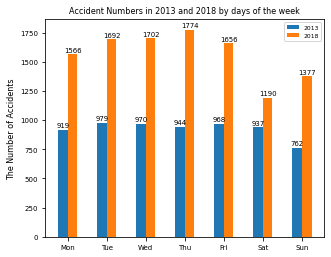

In [55]:
#| label: fig-bar-acc
#| fig-cap: "Accident numbers in 2013 and 2018"

# Task 1.3 a) Accidents Per Day of the Week
dp.plot_bars_accidents(data2013, data2018)

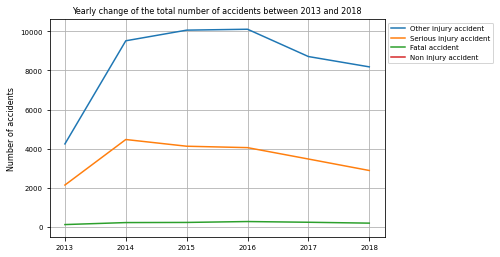

In [56]:
#| label: fig-line-change
#| fig-cap: "Yearly change of total number of accidents"

# Task 1.3 b) Total Accidents Over the Years
dp.show_accident_severity_stats(data2013, data2014, data2015, data2016, data2017, data2018)

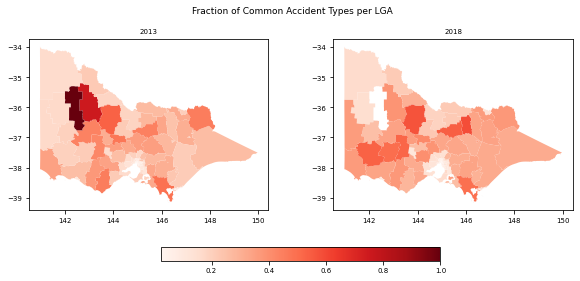

In [57]:
#| label: fig-choro
#| fig-cap: "Choropleth map of the most common category of accidents in 2013 and 2018"

# Task 1.3 c) Choropleth Maps of the Common Accident Types Per LGA
LGA17 = dp.import_shp(fileLGA)
mcat = dp.most_common_accident_type(comb_df)
cat_df = dp.create_choropleths(data2013, data2018, LGA17, mcat)

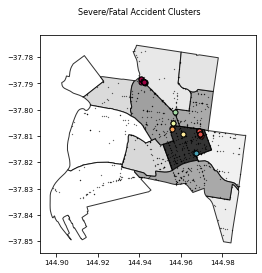

In [58]:
#| label: fig-cluster-severe
#| fig-cap: "Severe or fatal accident clusters"

ca.create_DBSCAN_with_pop(dataset=sev2, title="Severe/Fatal Accident Clusters")

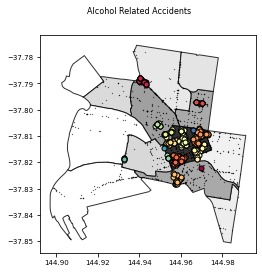

In [59]:
#| label: fig-alcohol
#| fig-cap: "Cluster map for alcohol related accidents"

ca.create_DBSCAN_with_pop(dataset=alc1, title="Alcohol Related Accidents")

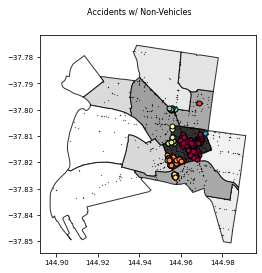

In [60]:
#| label: fig-acc-nonV
#| fig-cap: "Cluster map for accidents with non-vehicles"

ca.create_DBSCAN_with_pop(dataset=typ2, title="Accidents w/ Non-Vehicles")